In [1]:
from CelestialObjects import Planets
from NBodySimulator import Simulator
import numpy as np

In [2]:
Earth = Planets(name="Earth", mass=5.972e24, init_position=[0,0,0], init_velocity=[0,0,0], radius=6.4e6, planet_type="Rocky", planet_contour="Earth-like")
Moon = Planets(name="Moon", mass=7.348e22, init_position=[3.844e8, 0, 0], init_velocity=[0, 1022.0, 0], radius=1e5, planet_type="Rocky", planet_contour="Mars-like")
Rock = Planets(name="Rock", mass=1e12, radius=1e3, init_position=[1.76e8,0,0], init_velocity=[0, 198.0, 0], planet_contour="Earth-like", planet_type="Rocky")

In [28]:
simulation = Simulator(celestial_bodies=[Earth, Moon, Rock], method="Lagrangian", solver="rk4", time_step=10, simulation_time=1e6)

In [29]:
simulation.solve()

In [30]:
x = np.array(simulation.positions)

In [31]:
x.shape

(3, 100000, 3)

In [32]:
ear = x[0]
mon = x[1]
roc = x[2]

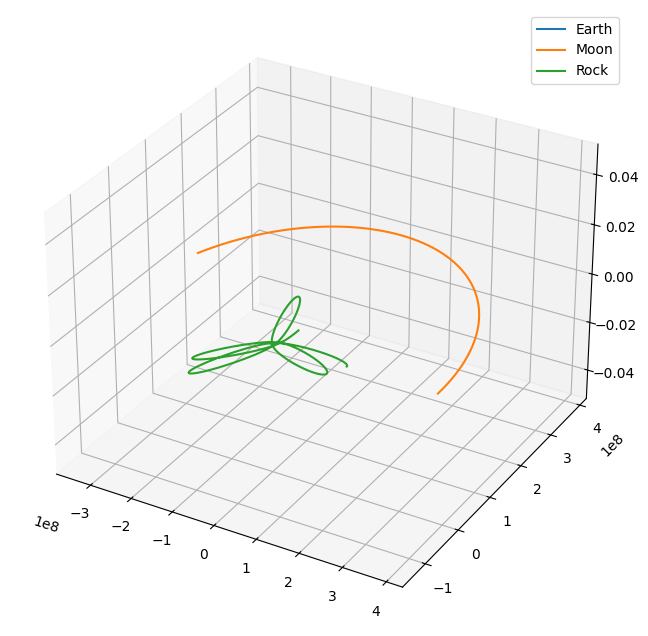

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot(ear[:,0], ear[:,1], ear[:,2], label="Earth")
ax.plot(mon[:,0], mon[:,1], mon[:,2], label="Moon")
ax.plot(roc[:,0], roc[:,1], roc[:,2], label="Rock")
plt.legend()
plt.show()

In [3]:
blist = [Earth, Moon, Rock]
orpos = np.array([b.init_position for b in blist])
orpos.shape

(3, 3)

In [4]:
orpos

array([[0.000e+00, 0.000e+00, 0.000e+00],
       [3.844e+08, 0.000e+00, 0.000e+00],
       [1.760e+08, 0.000e+00, 0.000e+00]])